# Question no.5 Can we predict Fractionalization of Government Legislature of different countries?

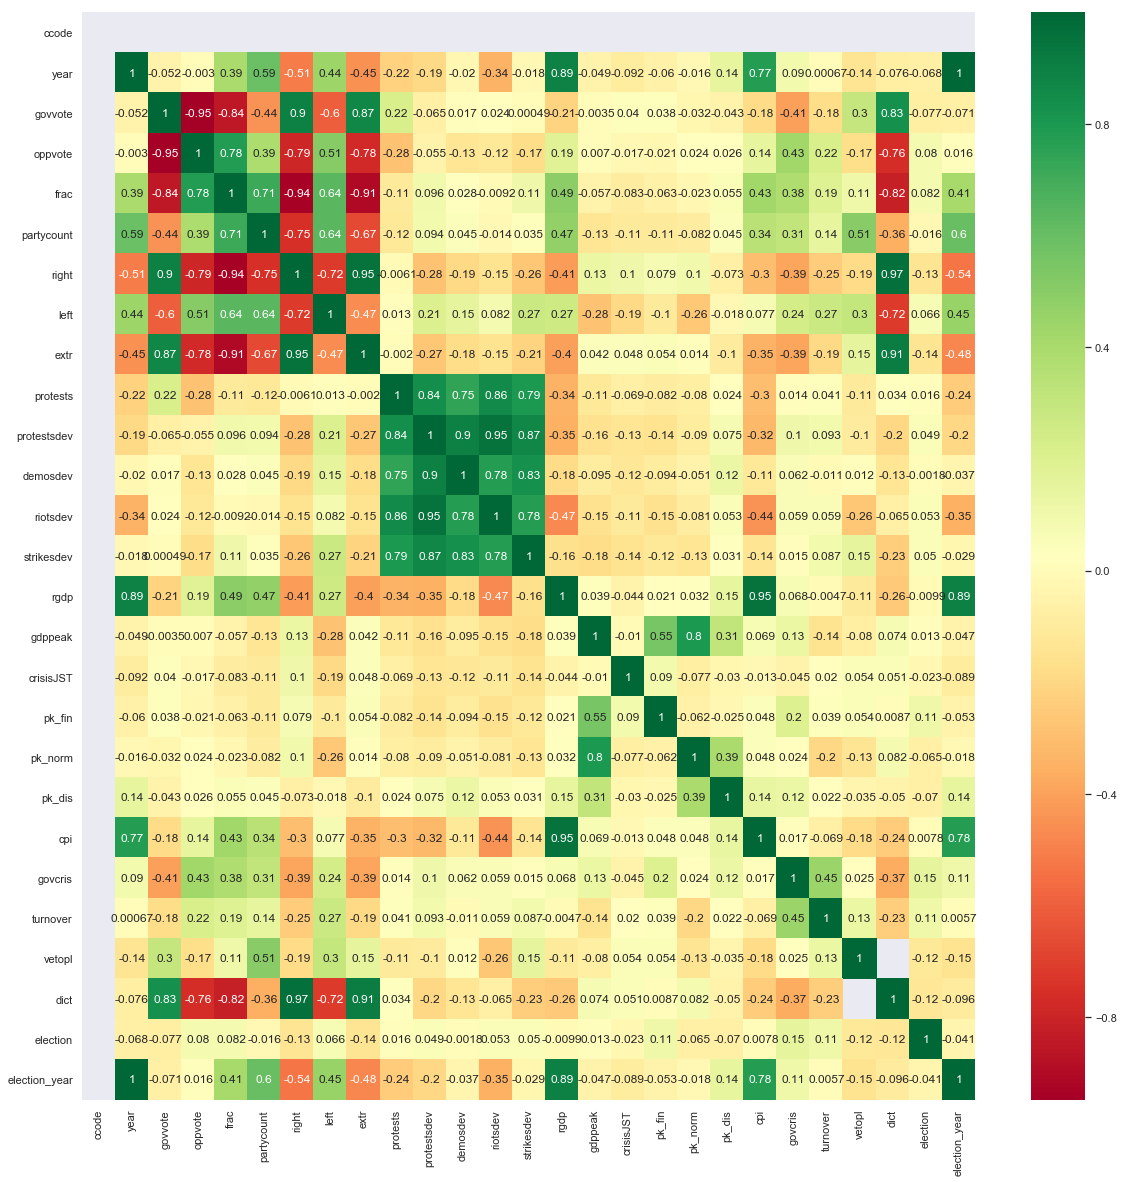

<Figure size 1440x1440 with 0 Axes>

In [71]:
#Imports
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Data Frame and Handling Missing Values
df = pd.read_csv('dataset.csv')
deu = df[(df['ccode'] == 14)]

deu_filled = deu.interpolate()
dataset = deu_filled.fillna(0)
corrmat = deu_filled.corr("pearson")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

sns.heatmap(deu_filled[top_corr_features].corr("pearson"),annot=True,cmap="RdYlGn")
plt.figure(figsize=(20,20))
plt.show()

In [74]:
#Predictors and Target Value
X = dataset[['right','partycount', 'left','protests','extr', 'govcris', 'demosdev',
       'riotsdev', 'strikesdev','vetopl','turnover','dict']]
y = dataset.frac

In [75]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [76]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print('Linear Regression')
print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))
print('\t')

Training score: 0.9117048900531584
Test score: 0.7764375166799682
RMSE: 0.11349989441254424


# Linear Regression

In [77]:
steps = [
    ('scalar', StandardScaler()),
    #('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
print('Linear Regression after scaling')
print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.9117048900217221
Test score: 0.7764375165867474
RMSE: 0.11349989443620775


C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all

# Ridge Regression

In [78]:
steps = [
    #('scalar', StandardScaler()),
    #('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
print('\tRidge Regression')
print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

y_pred = ridge_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training Score: 0.8843652770298334
Test Score: 0.7251702304004639
RMSE: 0.12584265775109008


# Lasso Regression

In [79]:
steps = [
    #('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.1, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)
print('\tLASSO Regression')
print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

y_pred = lasso_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.9259532111888267
Test score: 0.9309716039450682
RMSE: 0.06306812011556187


In [81]:
check = deu[(deu['year'] == 2000)]
check[['right','partycount', 'left','protests','extr', 'govcris', 'demosdev',
       'riotsdev', 'strikesdev','vetopl','turnover','dict','frac']]

,right,partycount,left,protests,extr,govcris,demosdev,riotsdev,strikesdev,vetopl,turnover,dict,frac
2015,26.700001,14.0,29.700001,0.0,56.400002,0.0,0.198529,0.121607,0.171949,4.809646,1.0,0,0.835767


In [82]:
lasso_pipe.predict([[26.7,14.0,29.7,0,56.4,0.0,0.198,0.12,0.171,4.809, 1,0]])

array([0.87251967])